In [160]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [118]:
#Import Data
data = pd.read_csv('Data/student-mat.csv',sep=';')

In [119]:
#Examine Data
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [141]:
#Missing Data?
print(data.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [142]:
#Initial Summary Statistics
print(data.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

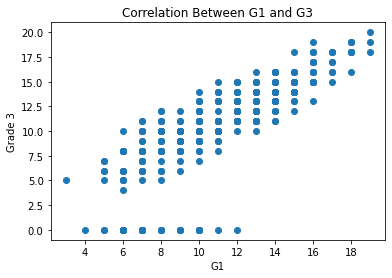

12.187682323459489


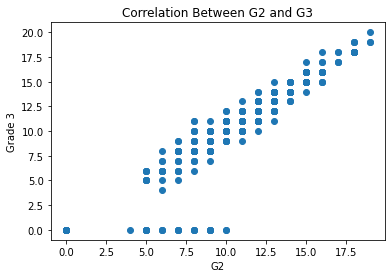

12.187682323459489


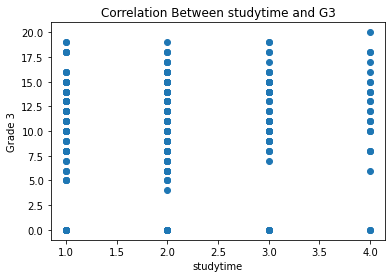

12.187682323459489


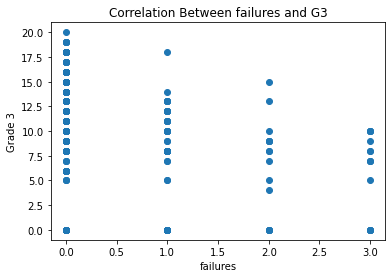

12.187682323459489


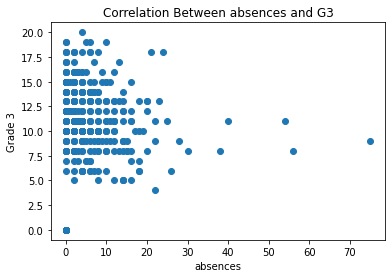

12.187682323459489


In [161]:
#EDA: Feature Importance/Selection
# Convariance: Strength of Linear relationships
data = data[['G1','G2','G3','studytime','failures','absences']]
target = 'G3'
#TODO turn this into a helper function. Compares covarianses and returns strongest independent variables.
for col in data.columns:
    if col == target:
        continue
    plt.scatter(data[col],data[target])
    plt.xlabel(str(col))
    plt.ylabel('Grade 3')
    plt.title(f'Correlation Between {col} and {target}')
    plt.show()
    cov = np.cov(data.G1, data.G3)
    print(cov[0][1])

In [90]:
#Process Data

In [91]:
#Split Data
x = np.array(data.drop([target],axis=1))
y = np.array(data[target])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [92]:
#Fit/Train Model
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [116]:
#Evaluate Model
print(linreg.score(x_test,y_test))
print(linreg.coef_)
y_pred = linreg.predict(x_test)
#print(f'The Intercept (grade) is {linreg.intercept_}')
for i in range(len(y_pred)):
    print(f'Predicted: {round(y_pred[i])}\t Actual: {y_test[i]} \t Data {x_test[i]}')

0.9534825653443382
[ 0.14158939  0.99309516 -0.20947348 -0.33983553  0.04430659]
Predicted: 10	 Actual: 11 	 Data [11 11  3  0  3]
Predicted: 8	 Actual: 9 	 Data [ 9  9  2  2 15]
Predicted: 9	 Actual: 9 	 Data [8 9 1 0 5]
Predicted: 16	 Actual: 15 	 Data [16 15  2  0 10]
Predicted: 13	 Actual: 12 	 Data [12 13  2  0 14]
Predicted: 16	 Actual: 16 	 Data [16 16  4  0 12]
Predicted: 12	 Actual: 13 	 Data [10 13  2  1  6]
Predicted: 11	 Actual: 10 	 Data [10 11  1  0  8]
Predicted: 9	 Actual: 10 	 Data [10  9  2  0 10]
Predicted: 14	 Actual: 14 	 Data [14 14  2  0  0]
Predicted: 15	 Actual: 15 	 Data [14 15  2  0  2]
Predicted: 16	 Actual: 16 	 Data [16 15  1  0  5]
Predicted: 20	 Actual: 19 	 Data [18 19  1  0 10]
Predicted: 9	 Actual: 9 	 Data [ 9  9  1  0 22]
Predicted: 14	 Actual: 11 	 Data [11 12  2  0 54]
Predicted: 17	 Actual: 17 	 Data [16 17  2  0  0]
Predicted: 9	 Actual: 10 	 Data [11  9  3  0 10]
Predicted: 13	 Actual: 13 	 Data [13 13  2  0  2]
Predicted: 8	 Actual: 8 	 Data [

In [109]:
#Tune Model